In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from LatticeData import *

# Create analyzer - instantiate class

In [2]:
analyzer = LatticeData(datadir = "/data_nls/")

# Systematics plots

In [3]:
df = analyzer.get_data()
sns.set_palette("magma", n_colors=len(df["length"].unique()))

In [4]:
itheta = 0.5*np.pi
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
plot_params = {"beta": beta, "nMC": nMC}#,"itheta": itheta, "length": length, "ntherm": ntherm}
df_systematics = analyzer.get_data(**plot_params)

In [5]:
df_systematics.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,100.0,0.0,-550.296626,-550.296626,83.605464,0.294422,0.215351,0.060000,0.0,...,1,5,5,3,18.605800,7.681612,0.382864,-0.381099,0.045920,-0.018958
1,100,100.0,0.0,-550.005382,-550.005382,81.430198,0.294422,0.215351,0.075941,0.0,...,1,5,5,3,18.362159,7.581022,0.382864,-0.381099,0.046529,-0.019210
2,200,100.0,-0.0,-561.757098,-561.757098,77.975513,0.294422,0.215351,0.078358,0.0,...,1,5,5,3,17.968430,7.418467,0.382864,-0.381099,0.047548,-0.019631
3,300,100.0,0.0,-548.790068,-548.790068,60.684397,0.294422,0.215351,0.081960,0.0,...,1,5,5,3,15.851469,6.544456,0.382864,-0.381099,0.053898,-0.022253
4,400,100.0,-0.0,-552.002353,-552.002353,71.693557,0.294422,0.215351,0.082444,1.0,...,1,5,5,3,17.229436,7.113365,0.382864,-0.381099,0.049588,-0.020473


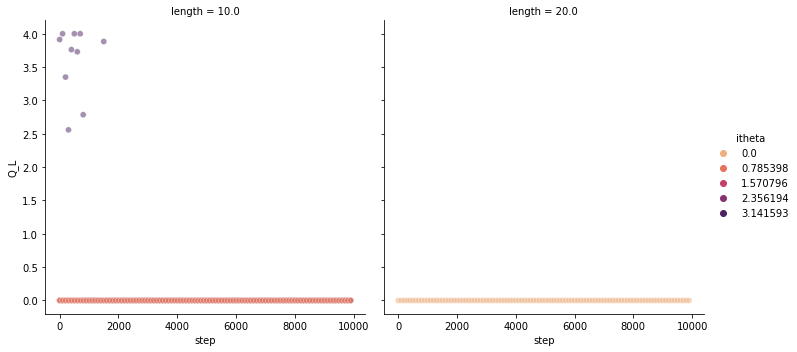

In [6]:
sns.relplot(data = df_systematics, x = "step", y = "Q_L", hue = "itheta",col = "length",
            alpha = 0.5,palette = "flare" )
plt.show()

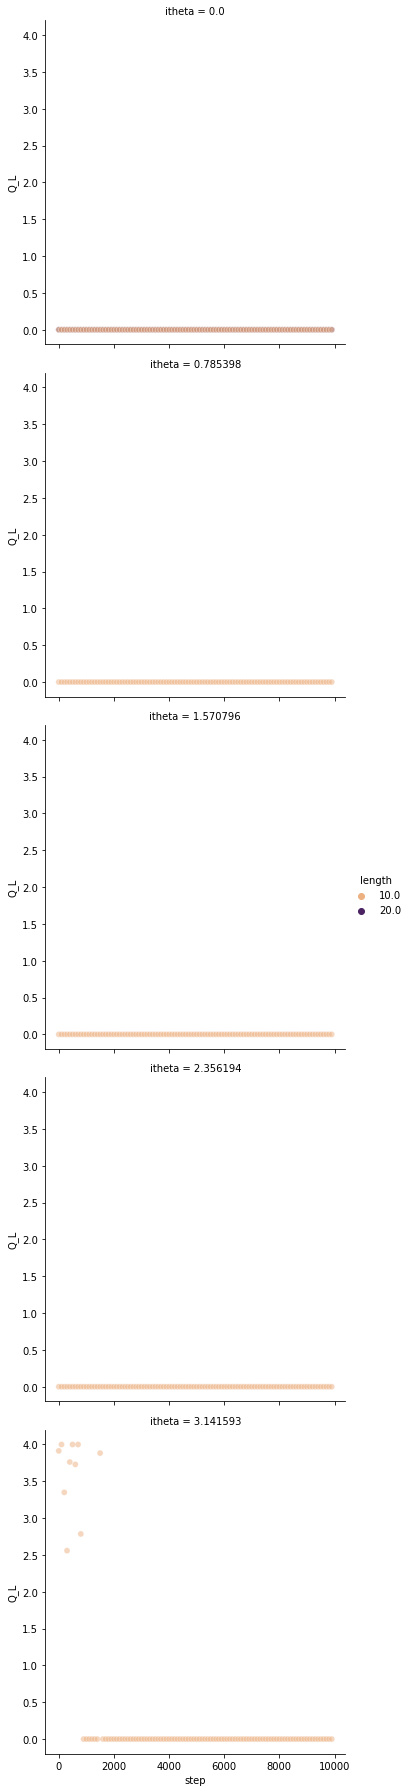

In [7]:
sns.relplot(data = df_systematics, x = "step", y = "Q_L", hue = "length",row = "itheta",
            alpha = 0.5,palette = "flare" )
plt.show()

In [8]:
itheta = 0.5*np.pi
beta = 1.6
length = 10
nMC = 10000
ntherm = 1000
acf_params = {"beta": beta, "nMC": nMC,"itheta": itheta, "length": length, "ntherm": ntherm}

In [9]:
run = analyzer.get_data(single_run = True,suppress_output = False,**acf_params)

freq 100
nMC 10000
ntherm 1000
itheta 1.570796
beta 1.6
length 10


In [10]:
run.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,100.0,0.0,-550.296626,-550.296626,83.605464,0.294422,0.215351,0.060000,0.0,...,1,5,5,3,18.605800,7.681612,0.382864,-0.381099,0.045920,-0.018958
1,100,100.0,0.0,-550.005382,-550.005382,81.430198,0.294422,0.215351,0.075941,0.0,...,1,5,5,3,18.362159,7.581022,0.382864,-0.381099,0.046529,-0.019210
2,200,100.0,-0.0,-561.757098,-561.757098,77.975513,0.294422,0.215351,0.078358,0.0,...,1,5,5,3,17.968430,7.418467,0.382864,-0.381099,0.047548,-0.019631
3,300,100.0,0.0,-548.790068,-548.790068,60.684397,0.294422,0.215351,0.081960,0.0,...,1,5,5,3,15.851469,6.544456,0.382864,-0.381099,0.053898,-0.022253
4,400,100.0,-0.0,-552.002353,-552.002353,71.693557,0.294422,0.215351,0.082444,1.0,...,1,5,5,3,17.229436,7.113365,0.382864,-0.381099,0.049588,-0.020473


In [11]:
decorr = analyzer.ta(run["Q_L"])

In [12]:
run = analyzer.autocorrelation(run)

/Users/cberger/NonlinearSigmaModel/nonlinearsigmaCL/Analysis/LatticeData.py:186: RuntimeWarning: invalid value encountered in divide
  acf /= acf[0]


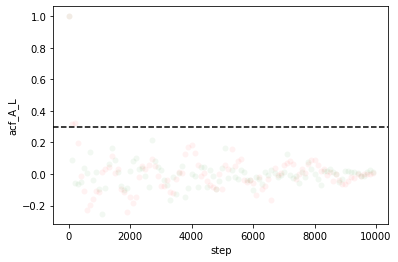

In [13]:
sns.scatterplot(data = run, x = "step", y = "acf_Q_L", color = "blue", alpha = 0.05)
sns.scatterplot(data = run, x = "step", y = "acf_A_L", color = "red", alpha = 0.05)
sns.scatterplot(data = run, x = "step", y = "acf_Xi_L", color = "green", alpha = 0.05)
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

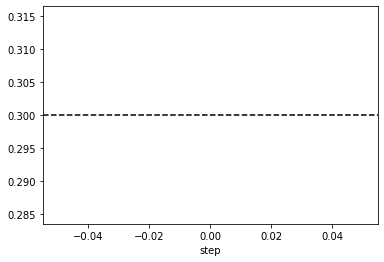

In [14]:
sns.scatterplot(data = run, x = "step", y = "acf_Q_L", color = "blue")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

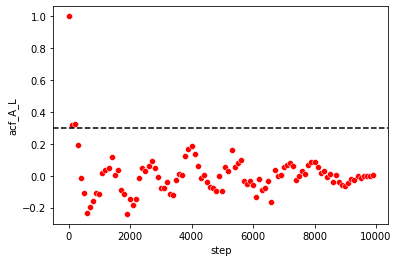

In [15]:
sns.scatterplot(data = run, x = "step", y = "acf_A_L", color = "red")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

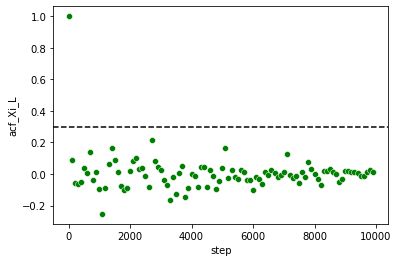

In [16]:
sns.scatterplot(data = run, x = "step", y = "acf_Xi_L", color = "green")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

In [27]:
df_ta = analyzer.do_stats(therm = 0.0, **plot_params)
df_ta = df_ta[['Q_L_ta', 'A_L_ta', 'S_L_ta', 'Xi_L_ta']]
df_ta = df_ta.rename(columns = {'Q_L_ta':"Q_L", 'A_L_ta':"A_L", 'S_L_ta':"S_L", 'Xi_L_ta':"Xi_L"})
df_ta.columns.name = "observable"
df_ta = df_ta.stack()
df_ta.name = "ta"
df_ta = df_ta.to_frame()

In [28]:
df_ta.head()

ta
length itheta   beta nMC     ntherm observable     
10.0   0.000000 1.6  10000.0 1000.0 Q_L         1.0
                                    A_L         4.0
                                    S_L         4.0
                                    Xi_L        8.0
       0.785398 1.6  10000.0 1000.0 Q_L         1.0

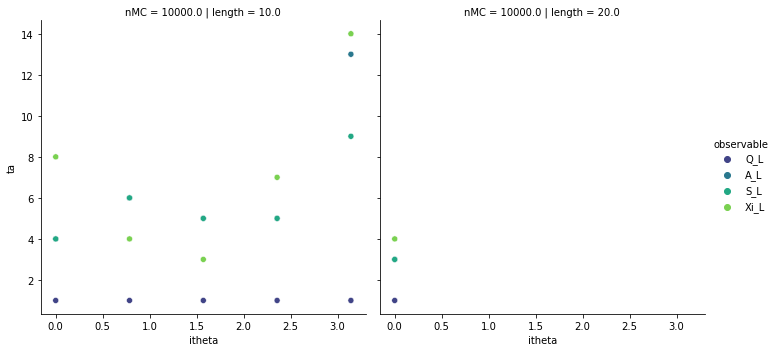

In [29]:
sns.relplot(data = df_ta, x = "itheta", y = "ta", hue = "observable", col = "length", row = "nMC",
           palette = analyzer.palette)
plt.show()

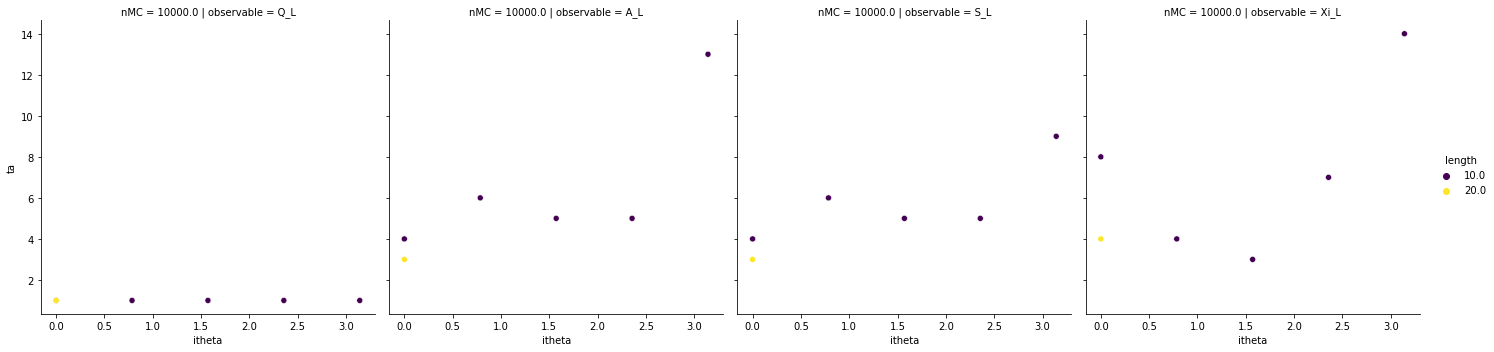

In [20]:
sns.relplot(data = df_ta, x = "itheta", y = "ta", hue = "length", col = "observable", row = "nMC",
           palette = analyzer.palette)
plt.show()

# Timing

Note, not all output files have timing info, so we will need to deal with nans.

In [21]:
df_dt = analyzer.get_data()

In [22]:
df_dt = df_dt.dropna(subset = ['dt'])

In [23]:
df_dt.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,100.0,0.0,-550.296626,-550.296626,83.605464,0.294422,0.215351,0.060000,0.0,...,1,5,5,3,18.605800,7.681612,0.382864,-0.381099,0.045920,-0.018958
1,100,100.0,0.0,-550.005382,-550.005382,81.430198,0.294422,0.215351,0.075941,0.0,...,1,5,5,3,18.362159,7.581022,0.382864,-0.381099,0.046529,-0.019210
2,200,100.0,-0.0,-561.757098,-561.757098,77.975513,0.294422,0.215351,0.078358,0.0,...,1,5,5,3,17.968430,7.418467,0.382864,-0.381099,0.047548,-0.019631
3,300,100.0,0.0,-548.790068,-548.790068,60.684397,0.294422,0.215351,0.081960,0.0,...,1,5,5,3,15.851469,6.544456,0.382864,-0.381099,0.053898,-0.022253
4,400,100.0,-0.0,-552.002353,-552.002353,71.693557,0.294422,0.215351,0.082444,1.0,...,1,5,5,3,17.229436,7.113365,0.382864,-0.381099,0.049588,-0.020473


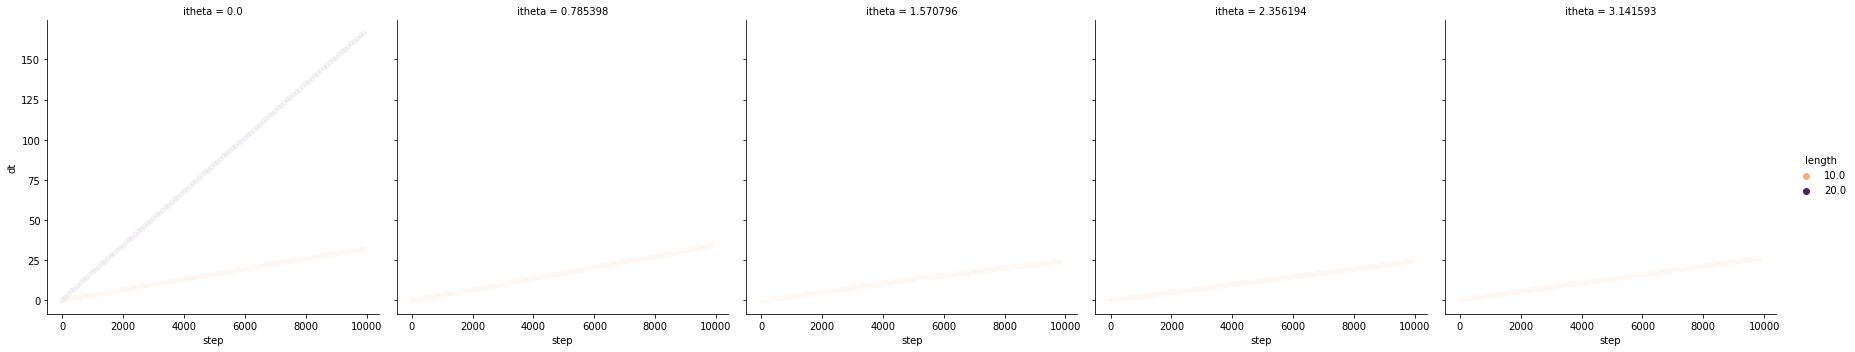

In [24]:
sns.relplot(data = df_dt, x = "step", y = "dt", hue = "length",col = "itheta",
            alpha = 0.05,palette = "flare" )
plt.show()

In [25]:
df_time = analyzer.do_stats()

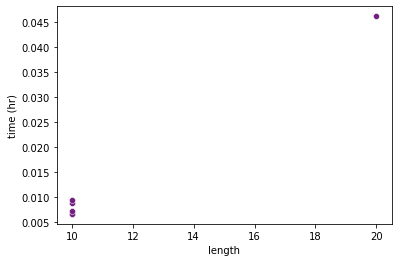

In [26]:
sns.scatterplot(data = df_time, x = "length", y = "time (hr)")
#plt.yscale('log')
plt.show()